# **Assignment 6: Knock Airport Weather**

  
-   plot temperature
-   mean temperature each day
-   mean temperature each month
-   windspeed
-   rolling windspeed (24hours)
-   the max windspeed each day
-   monthly mean of the daily max windspeeds

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




In [2]:
# Load Data
df = pd.read_csv('https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv', skiprows=23, header=0, low_memory=False)

df.head()

,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
0,10-apr-1996 14:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,...,0,0,0,0,25,81,0.0,35000,32,5
1,31-jul-1996 08:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,...,0,0,0,0,25,82,0.0,40000,45,5
2,31-jul-1996 09:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,...,0,0,0,0,80,81,0.0,8000,32,7
3,31-jul-1996 10:00,0,0.0,0,12.9,0,11.3,9.8,0.0,0,...,0,0,0,0,25,82,0.0,28000,35,6
4,31-jul-1996 11:00,0,0.0,0,14.5,0,10.8,7.0,0.0,0,...,0,0,0,0,2,11,0.0,40000,40,6


In [3]:
df['date']

0         10-apr-1996 14:00
1         31-jul-1996 08:00
2         31-jul-1996 09:00
3         31-jul-1996 10:00
4         31-jul-1996 11:00
                ...        
248389    30-nov-2024 20:00
248390    30-nov-2024 21:00
248391    30-nov-2024 22:00
248392    30-nov-2024 23:00
248393    01-dec-2024 00:00
Name: date, Length: 248394, dtype: object

In [4]:
df['date'] = pd.to_datetime(df['date'])




C:\Users\louis\AppData\Local\Temp\ipykernel_28252\1058645056.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'])


In [5]:
df.set_index('date', inplace=True) # Set the date as the index 

df.head()

,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,msl,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
date,,,,,,,,,,,,,,,,,,,,
1996-04-10 14:00:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,1016.7,0,0,0,0,25,81,0.0,35000,32,5
1996-07-31 08:00:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,1011.4,0,0,0,0,25,82,0.0,40000,45,5
1996-07-31 09:00:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,1011.4,0,0,0,0,80,81,0.0,8000,32,7
1996-07-31 10:00:00,0,0.0,0,12.9,0,11.3,9.8,0.0,0,1011.2,0,0,0,0,25,82,0.0,28000,35,6
1996-07-31 11:00:00,0,0.0,0,14.5,0,10.8,7.0,0.0,0,1011.0,0,0,0,0,2,11,0.0,40000,40,6


In [8]:
# convert to datetime
df.index = pd.to_datetime(df.index)



In [11]:
#df['2019-01-01':'2019-12-31']
df['index']

date
1996-04-10 14:00:00   1996-04-10 14:00:00
1996-07-31 08:00:00   1996-07-31 08:00:00
1996-07-31 09:00:00   1996-07-31 09:00:00
1996-07-31 10:00:00   1996-07-31 10:00:00
1996-07-31 11:00:00   1996-07-31 11:00:00
                              ...        
2024-11-30 20:00:00   2024-11-30 20:00:00
2024-11-30 21:00:00   2024-11-30 21:00:00
2024-11-30 22:00:00   2024-11-30 22:00:00
2024-11-30 23:00:00   2024-11-30 23:00:00
2024-12-01 00:00:00   2024-12-01 00:00:00
Name: index, Length: 248394, dtype: datetime64[ns]

In [12]:
df['index'] = pd.to_datetime(df['index'], format='%Y-%m-%d %H:%M:%S')

In [15]:
df.head()

,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,msl,...,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt,index
date,,,,,,,,,,,,,,,,,,,,,
1996-04-10 14:00:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,1016.7,...,0,0,0,25,81,0.0,35000,32,5,1996-04-10 14:00:00
1996-07-31 08:00:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,1011.4,...,0,0,0,25,82,0.0,40000,45,5,1996-07-31 08:00:00
1996-07-31 09:00:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,1011.4,...,0,0,0,80,81,0.0,8000,32,7,1996-07-31 09:00:00
1996-07-31 10:00:00,0,0.0,0,12.9,0,11.3,9.8,0.0,0,1011.2,...,0,0,0,25,82,0.0,28000,35,6,1996-07-31 10:00:00
1996-07-31 11:00:00,0,0.0,0,14.5,0,10.8,7.0,0.0,0,1011.0,...,0,0,0,2,11,0.0,40000,40,6,1996-07-31 11:00:00


In [17]:
# check missing values

df.isna().sum()

ind      0
rain     0
ind.1    0
temp     0
ind.2    0
wetb     0
dewpt    0
vappr    0
rhum     0
msl      0
ind.3    0
wdsp     0
ind.4    0
wddir    0
ww       0
w        0
sun      0
vis      0
clht     0
clamt    0
index    0
dtype: int64

In [18]:
# change temp and wdsp to numeric data type
#df['temp']=pd.to_numeric(df['temp'], errors='coerce') 
df['wdsp']=pd.to_numeric(df['wdsp'], errors='coerce') # coerce gives NA values for non numeric data in the  wdsp column.

# change all columns to numeric data type 
#df = df.apply(pd.to_numeric, errors='coerce')


df.dtypes

ind               int64
rain             object
ind.1             int64
temp            float64
ind.2             int64
wetb            float64
dewpt           float64
vappr           float64
rhum              int64
msl              object
ind.3             int64
wdsp            float64
ind.4             int64
wddir            object
ww               object
w                object
sun             float64
vis              object
clht             object
clamt            object
index    datetime64[ns]
dtype: object

In [19]:
df.isna().sum()

ind       0
rain      0
ind.1     0
temp      0
ind.2     0
wetb      0
dewpt     0
vappr     0
rhum      0
msl       0
ind.3     0
wdsp     50
ind.4     0
wddir     0
ww        0
w         0
sun       0
vis       0
clht      0
clamt     0
index     0
dtype: int64

In [20]:
# drop rows with missing values 
df.dropna(inplace=True)

In [21]:
# check missing values

df.isna().sum()

ind      0
rain     0
ind.1    0
temp     0
ind.2    0
wetb     0
dewpt    0
vappr    0
rhum     0
msl      0
ind.3    0
wdsp     0
ind.4    0
wddir    0
ww       0
w        0
sun      0
vis      0
clht     0
clamt    0
index    0
dtype: int64

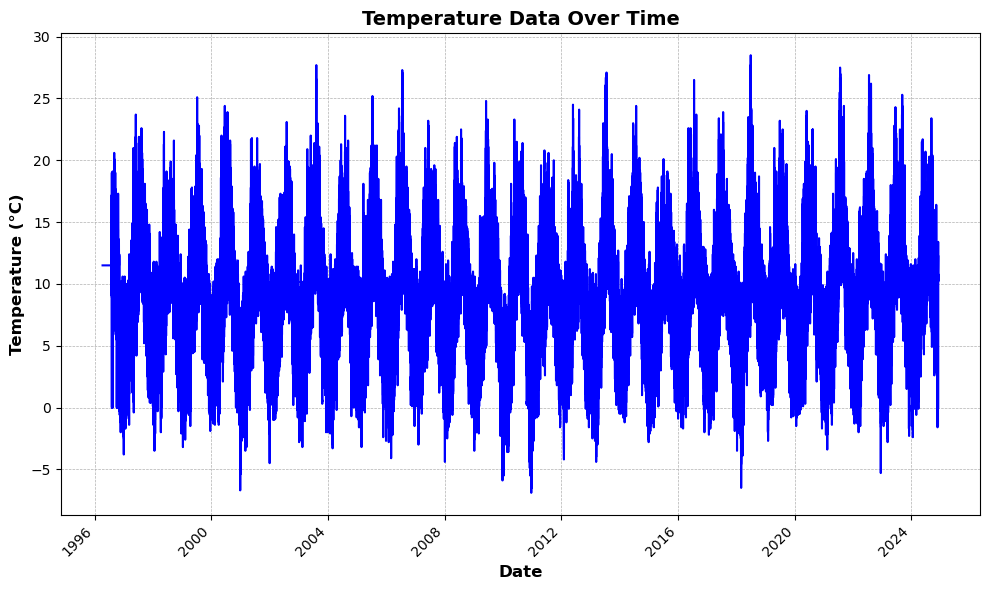

In [23]:
# Plot temperature data

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(df['index'], df['temp'], color='blue', label='Temperature')  # Line plot
ax.set_xlabel('Date', fontsize=12, fontweight='bold')
ax.set_ylabel('Temperature (°C)', fontsize=12, fontweight='bold')
ax.set_title('Temperature Data Over Time', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()


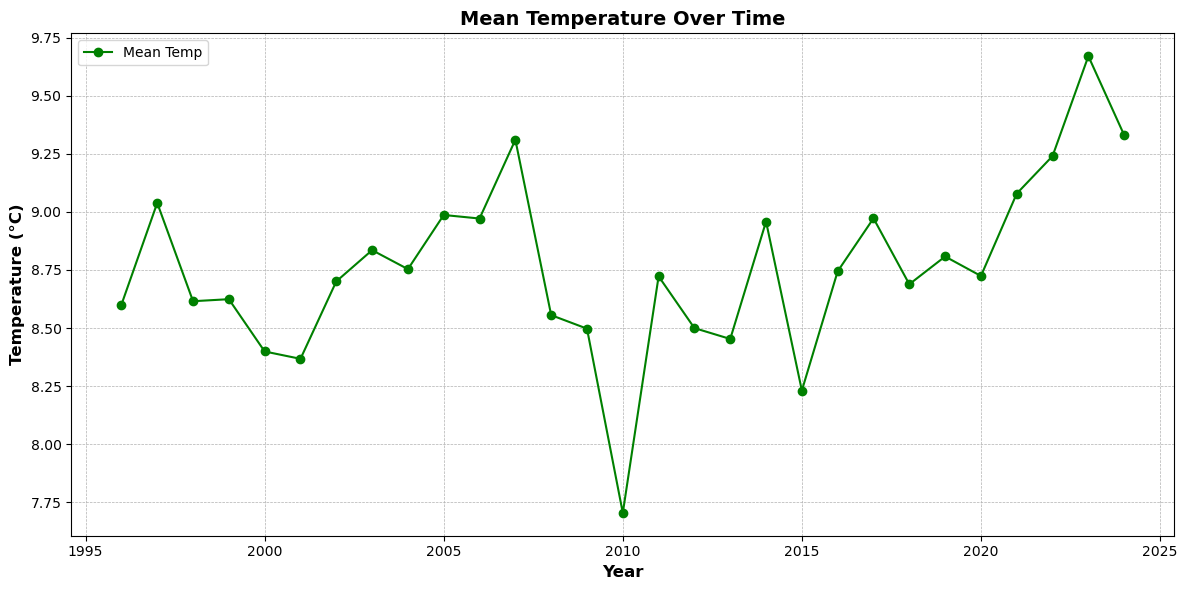

In [24]:
# plot mean temperature for each year
fig, ax = plt.subplots(figsize=(12, 6))

df_mean_temp = df.groupby(df['index'].dt.year)['temp'].mean()

ax.plot(df_mean_temp.index, df_mean_temp.values, label='Mean Temp', marker='o', color='g')

ax.set_xlabel('Year', fontsize=12, fontweight='bold')
ax.set_ylabel('Temperature (°C)', fontsize=12, fontweight='bold')
ax.set_title('Mean Temperature Over Time', fontsize=14, fontweight='bold')
ax.legend(fontsize=10, loc='upper left')
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

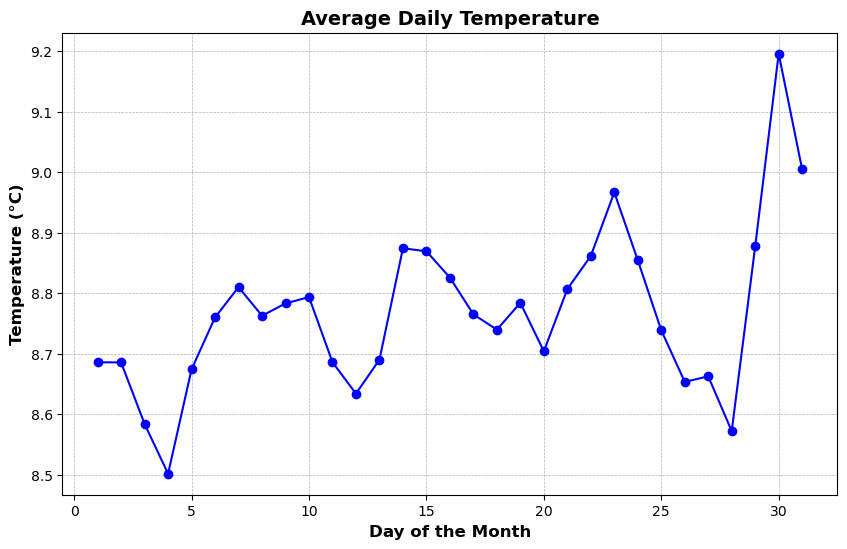

In [25]:

# Plot the daily mean temperature for each day of the month

daily_mean_temp=df.groupby(df['index'].dt.day)['temp'].mean()


fig, ax = plt.subplots(figsize=(10, 6))
daily_mean_temp.plot(ax=ax, marker='o', color='blue')
ax.set_title('Average Daily Temperature', fontsize=14, fontweight='bold')
ax.set_xlabel('Day of the Month', fontsize=12, fontweight='bold')
ax.set_ylabel('Temperature (°C)', fontsize=12, fontweight='bold')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.show()


In [26]:
# calculate daily mean temperature

daily_mean_temp=df.groupby(df['index'].dt.day)['temp'].mean()
print(daily_mean_temp)


index
1     8.685662
2     8.685343
3     8.583578
4     8.501336
5     8.673983
6     8.759755
7     8.809939
8     8.762574
9     8.782929
10    8.793383
11    8.685711
12    8.633725
13    8.689902
14    8.874117
15    8.869171
16    8.825632
17    8.764909
18    8.739485
19    8.783909
20    8.703750
21    8.806544
22    8.861446
23    8.966597
24    8.854406
25    8.738493
26    8.653175
27    8.662351
28    8.571789
29    8.877312
30    9.195806
31    9.004509
Name: temp, dtype: float64


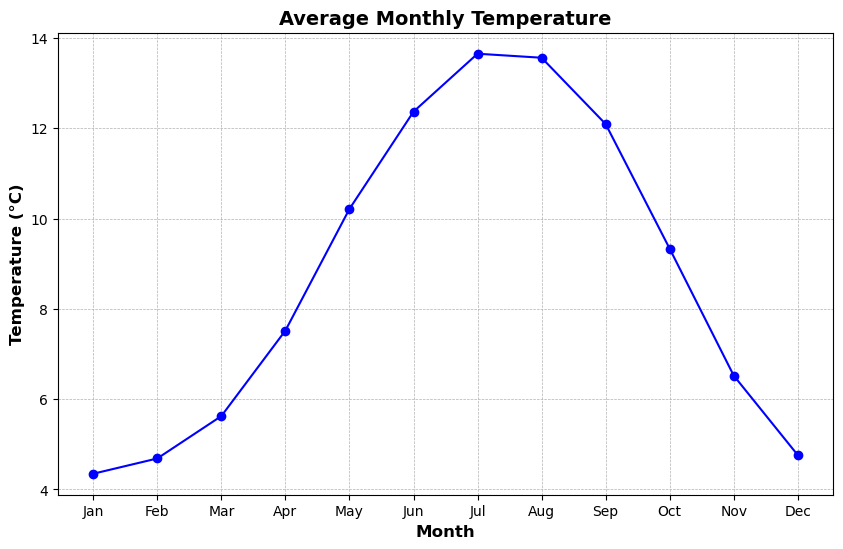

In [27]:
# plot the mean monthly temperature


months=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Group by month and calculate the mean temperature
monthly_mean_temp = df.groupby(df['index'].dt.month)['temp'].mean()

# Plot the monthly mean temperature
monthly_mean_temp.plot(figsize=(10, 6), marker='o', color='blue')
plt.title('Average Monthly Temperature', fontsize=14, fontweight='bold')
plt.xlabel('Month', fontsize=12, fontweight='bold')
plt.xticks(monthly_mean_temp.index, labels=months)
plt.ylabel('Temperature (°C)', fontsize=12, fontweight='bold')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.show()








In [28]:
# calculate mean monthly temperature

monthly_mean_temp = df.groupby(df['index'].dt.month)['temp'].mean()
monthly_mean_temp

index
1      4.348502
2      4.686452
3      5.625178
4      7.519131
5     10.212284
6     12.366806
7     13.650432
8     13.561395
9     12.092413
10     9.331425
11     6.521247
12     4.760255
Name: temp, dtype: float64

## **Windspeed:**

In [29]:
df.dtypes

ind               int64
rain             object
ind.1             int64
temp            float64
ind.2             int64
wetb            float64
dewpt           float64
vappr           float64
rhum              int64
msl              object
ind.3             int64
wdsp            float64
ind.4             int64
wddir            object
ww               object
w                object
sun             float64
vis              object
clht             object
clamt            object
index    datetime64[ns]
dtype: object

In [30]:
df.isna().sum()

ind      0
rain     0
ind.1    0
temp     0
ind.2    0
wetb     0
dewpt    0
vappr    0
rhum     0
msl      0
ind.3    0
wdsp     0
ind.4    0
wddir    0
ww       0
w        0
sun      0
vis      0
clht     0
clamt    0
index    0
dtype: int64

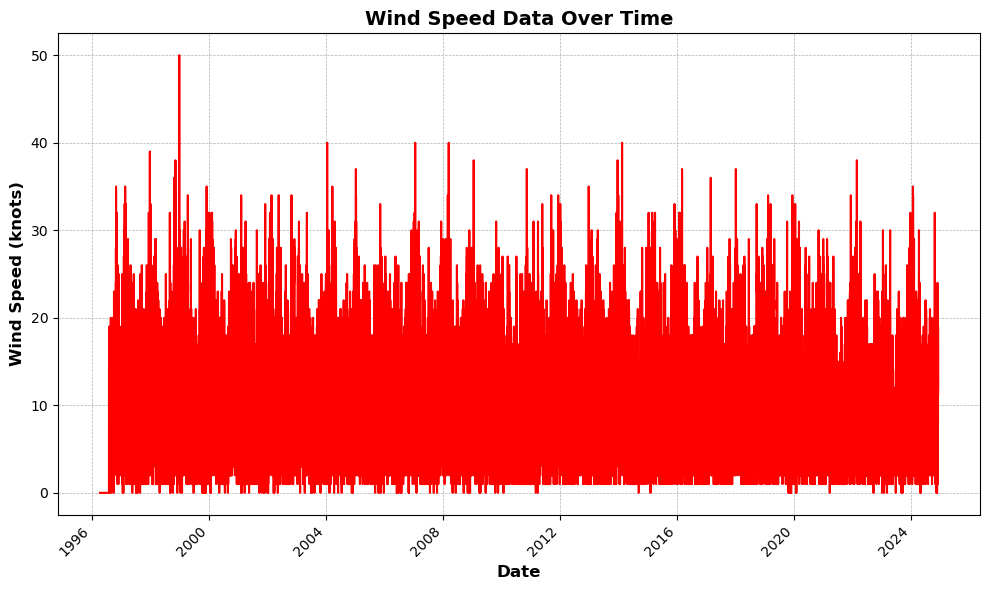

In [31]:
# plot wdsp data 
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(df['index'], df['wdsp'], color='red', label='Wind Speed')  # Line plot
ax.set_xlabel('Date', fontsize=12, fontweight='bold')
ax.set_ylabel('Wind Speed (knots)', fontsize=12, fontweight='bold')
ax.set_title('Wind Speed Data Over Time', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

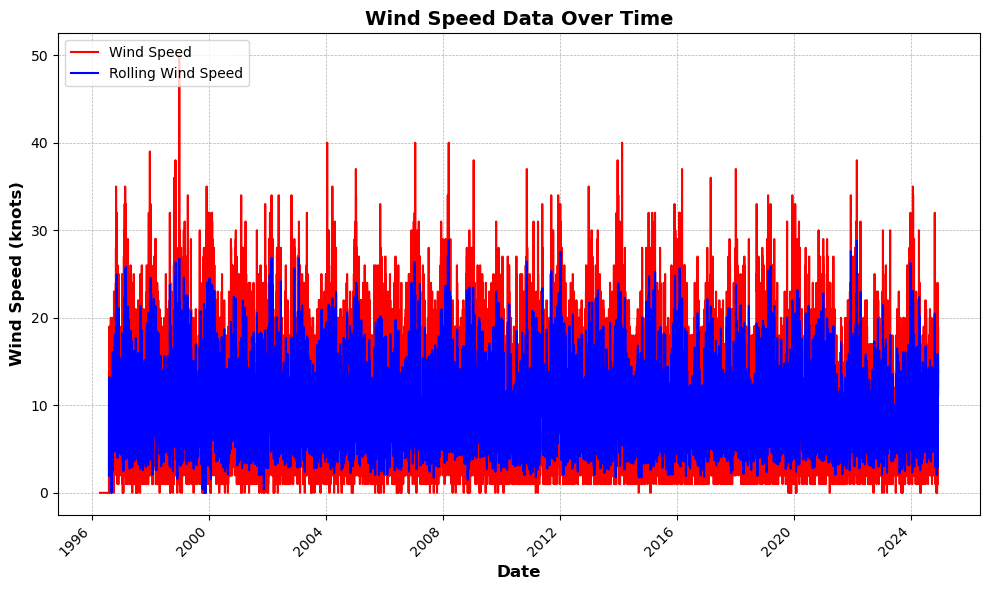

In [ ]:
# rolling-wdsp plot
df['rolling-wdsp'] = df['wdsp'].rolling(window=24).mean()

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(df['index'], df['wdsp'], color='red', label='Wind Speed')  # Line plot
ax.plot(df['index'], df['rolling-wdsp'], color='blue', label='Rolling Wind Speed')  # Line plot
ax.set_xlabel('Date', fontsize=12, fontweight='bold')

ax.set_ylabel('Wind Speed (knots)', fontsize=12, fontweight='bold')
ax.set_title('Wind Speed Data Over Time', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
ax.legend(fontsize=10, loc='upper left')

plt.tight_layout()
plt.show()

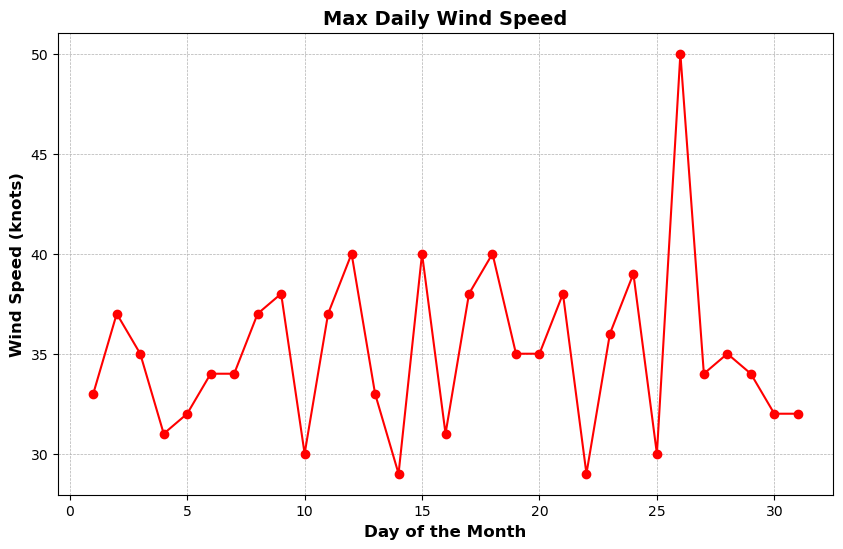

index
1     33.0
2     37.0
3     35.0
4     31.0
5     32.0
6     34.0
7     34.0
8     37.0
9     38.0
10    30.0
11    37.0
12    40.0
13    33.0
14    29.0
15    40.0
16    31.0
17    38.0
18    40.0
19    35.0
20    35.0
21    38.0
22    29.0
23    36.0
24    39.0
25    30.0
26    50.0
27    34.0
28    35.0
29    34.0
30    32.0
31    32.0
Name: wdsp, dtype: float64


In [35]:
# plot max windspeed per day of the month
daily_max_wdsp=df.groupby(df['index'].dt.day)['wdsp'].max()

fig, ax = plt.subplots(figsize=(10, 6))
daily_max_wdsp.plot(ax=ax, marker='o', color='red')
ax.set_title('Max Daily Wind Speed', fontsize=14, fontweight='bold')
ax.set_xlabel('Day of the Month', fontsize=12, fontweight='bold')
ax.set_ylabel('Wind Speed (knots)', fontsize=12, fontweight='bold')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.show()

# calculate daily max wind speed using groupby and max functions
daily_max_wdsp=df.groupby(df['index'].dt.day)['wdsp'].max()
print(daily_max_wdsp)

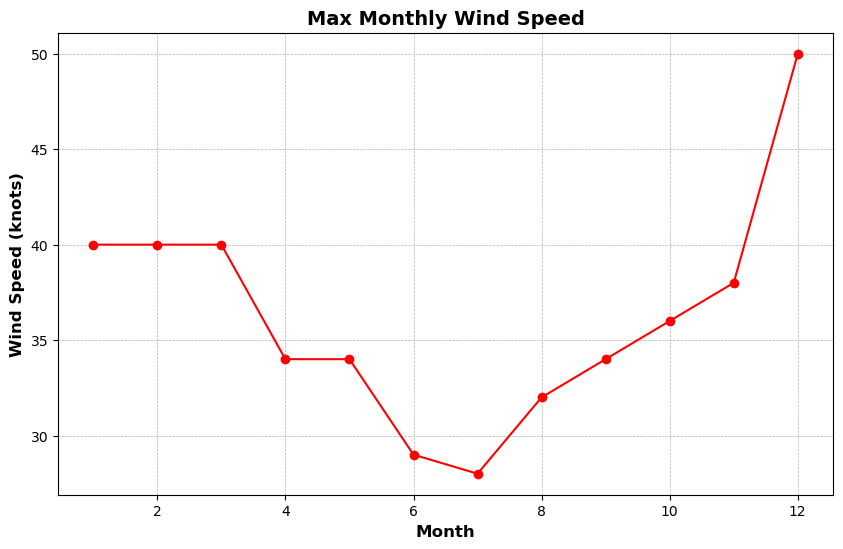

In [38]:
# plot max monthly wind speed
monthly_max_wdsp=df.groupby(df['index'].dt.month)['wdsp'].max()

fig, ax = plt.subplots(figsize=(10, 6))
monthly_max_wdsp.plot(ax=ax, marker='o', color='red')
ax.set_title('Max Monthly Wind Speed', fontsize=14, fontweight='bold')
ax.set_xlabel('Month', fontsize=12, fontweight='bold')
ax.set_ylabel('Wind Speed (knots)', fontsize=12, fontweight='bold')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.show()


The maximum montly windspeed shows the maximum windspeed each month. The highest value from the entire month. 

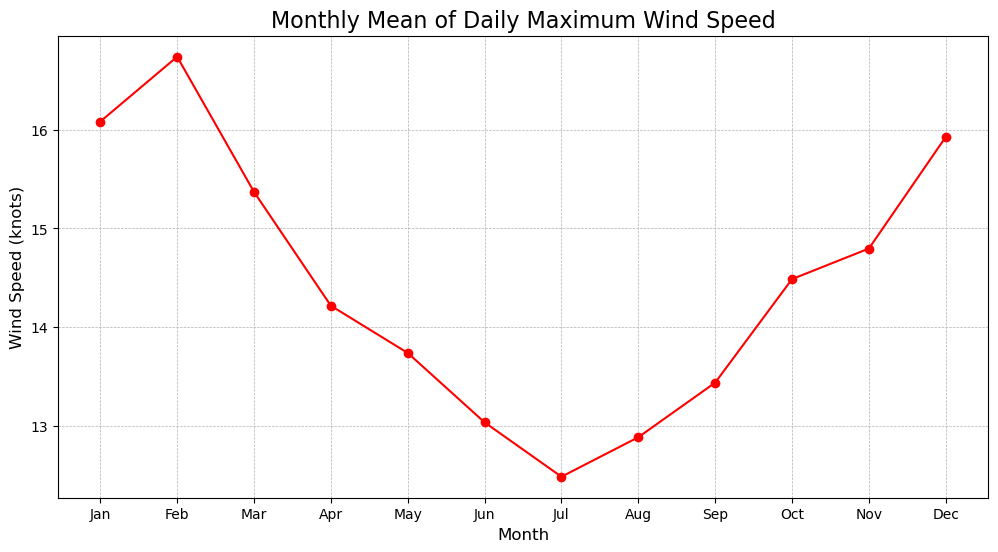

In [39]:
daily_max_wdsp = df.groupby(df['index'].dt.date)['wdsp'].max() # Group by date and get the max wind speed for each day 
monthly_mean_wdsp = daily_max_wdsp.groupby(daily_max_wdsp.index.to_series().apply(lambda x: x.month)).mean() #lambda function to extract month from date

plt.figure(figsize=(12, 6))
monthly_mean_wdsp.plot(marker='o', color='red')
plt.title('Monthly Mean of Daily Maximum Wind Speed', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Wind Speed (knots)', fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5)

# Customize the x-axis to show month names
plt.xticks(ticks=range(1, 13), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
                                       "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])

plt.show()

The monthly mean of daily max windspeeds shows the average of the daily highest windspeeds for each month. The maximum windspeed is taken each day and the average of these is then taken across each month. 

***
### **End**

References:
-   https://pandas.pydata.org/docs/user_guide/10min.html
-   https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html
-   https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.plot.html
-   https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html
-   https://www.geeksforgeeks.org/python-pandas-dataframe-rolling/